In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('total_field_data.csv')

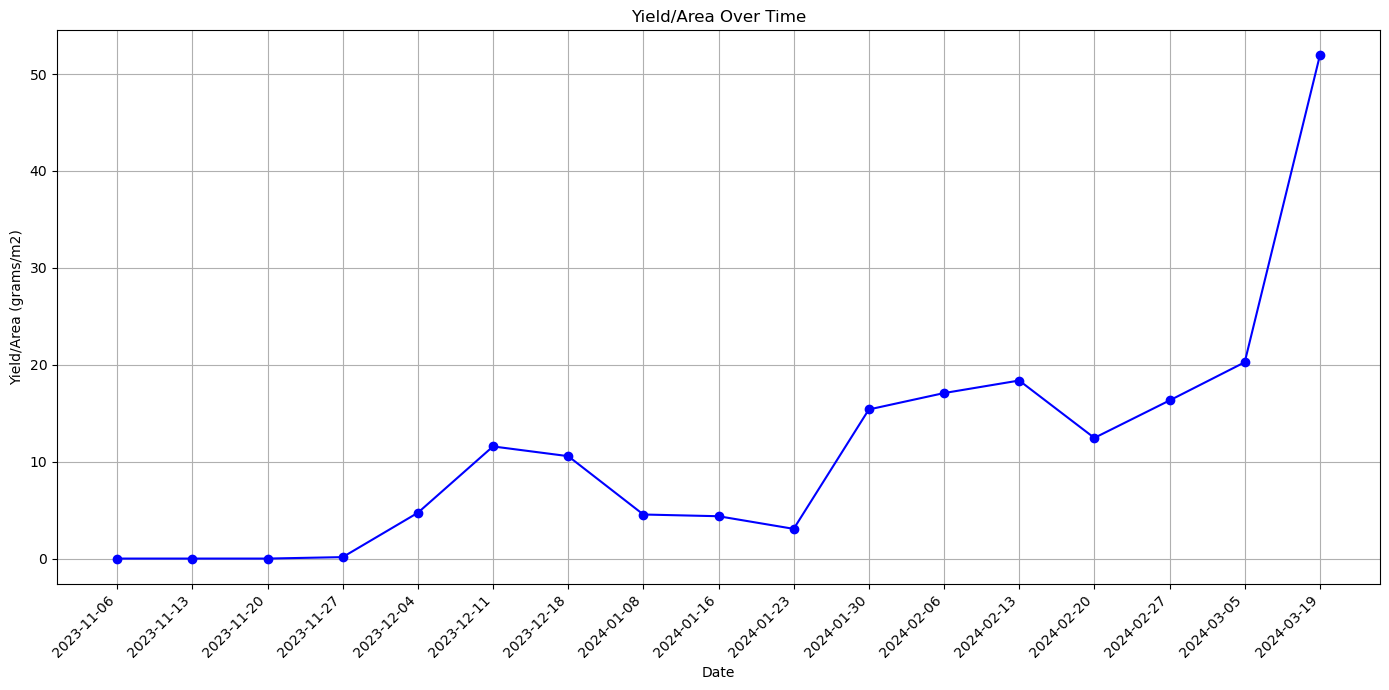

In [5]:
# Convert 'DATES' to a readable format for tick labels
df['DATES'] = pd.to_datetime(df['DATES'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

# Plotting 'Y/A' against the row number
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Y/A'], marker='o', linestyle='-', color='blue')
plt.title('Yield/Area Over Time')
plt.xlabel('Date')
plt.ylabel('Yield/Area (grams/m2)')

# Setting up the dates as x-axis tick labels
plt.xticks(df.index, df['DATES'], rotation=45, ha="right")  # Rotate for better readability

# Optional: For sparse tick labels, you can display every nth label
# n = 5  # Example: Show every 5th label
# for index, label in enumerate(plt.gca().get_xticklabels()):
#     if index % n != 0:
#         label.set_visible(False)

plt.tight_layout()
plt.grid(True)
plt.show()

In [6]:
columns = ['FL', 'G', 'W', 'P', 'R','canopy','Y/A']
df_train = df[columns].astype(float)

In [7]:
df_train

,FL,G,W,P,R,canopy,Y/A
0,112.0,0.0,0.0,0.0,0.0,87343940.0,0.000000
1,334.0,369.0,0.0,0.0,0.0,87343940.0,0.000000
2,548.0,843.0,17.0,0.0,0.0,87343940.0,0.000000
3,411.0,1053.0,386.0,36.0,10.0,87343940.0,0.149246
4,209.0,1049.0,558.0,118.0,214.0,87343940.0,4.723950
5,145.0,1250.0,630.0,228.0,495.0,81329128.0,11.570865
6,212.0,1101.0,556.0,211.0,586.0,85043448.0,10.567242
7,866.0,1274.0,181.0,152.0,333.0,71738874.0,4.546585
8,944.0,1472.0,397.0,118.0,222.0,135282969.0,4.369221
9,940.0,1229.0,543.0,173.0,156.0,100144908.0,3.066025


In [8]:
# Normalize the data
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(df_train)

In [9]:
scaled_data_test = scaled_data[12:15]

In [10]:
scaled_data_train = scaled_data[:12]

In [11]:
# Prepare sequences
trainX, trainY = [], []
past_no_of_days, future_no_of_days = 1, 1

In [12]:
for i in range(past_no_of_days, len(scaled_data_train) - future_no_of_days + 1):
    trainX.append(scaled_data_train[i - past_no_of_days:i])
    trainY.append(scaled_data_train[i + future_no_of_days - 1:i + future_no_of_days, 5])

trainX, trainY = torch.FloatTensor(trainX), torch.FloatTensor(trainY)

/var/folders/8r/_7fstk5d64bbhqc7gzp9cd280000gn/T/ipykernel_6178/3929030983.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:277.)
  trainX, trainY = torch.FloatTensor(trainX), torch.FloatTensor(trainY)
